In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord

In [24]:
import pandas as pd
tic = pd.read_csv('../../TESS/new_lc/db.csv')
kic = pd.read_csv('all_kepler_tic.csv')

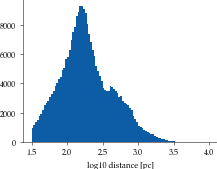

In [34]:
tic['frac_err'] = tic.e_plx / tic.plx
m = tic['frac_err'] < 0.1
tic['dist_pc'] = 1/(tic['plx'] * 0.001)
m &= tic['dist_pc'] > 0

plt.hist(np.log10(tic['dist_pc'][m]), bins=100, range=(1.5, 4));

plt.xlabel('log10 distance [pc]')

import astropy.units as u

coords = SkyCoord(
    ra=tic['ra'][m].values*u.deg,
    dec=tic['dec'][m].values*u.deg,
    distance=tic['dist_pc'][m].values*u.pc,
    frame='icrs')

galacto = coords.galactocentric

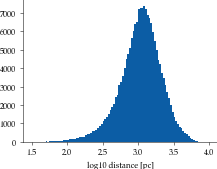

In [35]:
kic['frac_err'] = kic.e_plx / kic.plx
m = kic['frac_err'] < 0.1
kic['dist_pc'] = 1/(kic['plx'] * 0.001)
m &= kic['dist_pc'] > 0

plt.hist(np.log10(kic['dist_pc'][m]), bins=100, range=(1.5, 4));

plt.xlabel('log10 distance [pc]')

coords_kic = SkyCoord(
    ra=kic['ra'][m].values*u.deg,
    dec=kic['dec'][m].values*u.deg,
    distance=kic['dist_pc'][m].values*u.pc,
    frame='icrs')

gal_kic = coords_kic.galactocentric

In [38]:
plt.style.use('science')

from scipy.spatial import ConvexHull

points_tic = np.array([-1*galacto.x.to(u.kpc).value, -1*galacto.y.to(u.kpc).value]).T
hull_tic = ConvexHull(points_tic)

points_kic = np.array([-1*gal_kic.x.to(u.kpc).value, -1*gal_kic.y.to(u.kpc).value]).T
hull_kic = ConvexHull(points_kic)

No handles with labels found to put in legend.


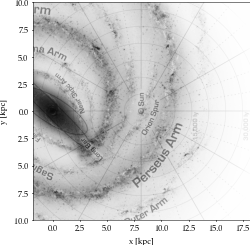

In [43]:
import pylab as plt
from mw_plot import MWPlot
from astropy import units as  u
import numpy as np

# setup a mw-plot instance of bird's eye view of the disc
mw1 = MWPlot(radius=10 * u.kpc, center=(8.175, 0)*u.kpc, 
             unit=u.kpc, 
             coord='galactocentric', annotation=True, grayscale=True, dpi=300)

# setup subplots with matplotlib
fig, (ax1) = plt.subplots(1, 1, figsize=(4., 4.))

# transform the whole figure with mw-plot
# mw1.transform([ax1, ax2]) will have the same effect
mw1.transform(ax1)

# # you can plot something on top of the transformed subplot
# ax1.scatter(-1*galacto.x.to(u.kpc).value, -1*galacto.y.to(u.kpc).value, c='C0', s=0.03, alpha=0.5, rasterized=True)
# ax2.scatter(-1*galacto.x.to(u.kpc).value, -1*galacto.z.to(u.kpc).value, c='C0', s=0.03, alpha=0.5, rasterized=True)
# ax1.fill(points_tic[hull_tic.vertices,0], points_tic[hull_tic.vertices,1], 'C0', alpha=0.2, label='TESS')
# ax1.fill(points_kic[hull_kic.vertices,0], points_kic[hull_kic.vertices,1], 'C2', alpha=0.2, label='Kepler')

# ax1.set_title("Orbit of the Sun in XY plane", fontsize=20)
# ax2.set_title("Orbit of the Sun in XZ plane", fontsize=20)
ax1.set_xlabel('x [kpc]', fontsize=8)
ax1.set_ylabel('y [kpc]', fontsize=8)
ax1.tick_params(axis='both', which='major', labelsize=8, width=1, length=1)
plt.legend()

plt.savefig('both_fields.svg', dpi=300, bbox_inches='tight')

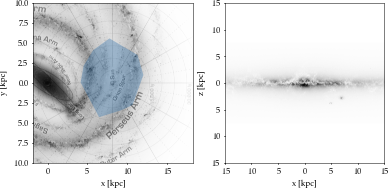

In [21]:
import pylab as plt
from mw_plot import MWPlot
from astropy import units as  u
import numpy as np

# setup a mw-plot instance of bird's eye view of the disc
mw1 = MWPlot(radius=10 * u.kpc, center=(8.175, 0)*u.kpc, 
             unit=u.kpc, 
             coord='galactocentric', annotation=True, grayscale=True)
mw2 = MWPlot(radius=15 * u.kpc, mode="edge-on", center=(0, 0)*u.kpc, unit=u.kpc, coord='galactocentric', annotation=False, grayscale=True)

# setup subplots with matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.3, 6.3/2))

# transform the whole figure with mw-plot
# mw1.transform([ax1, ax2]) will have the same effect
mw1.transform(ax1)
mw2.transform(ax2)

# # you can plot something on top of the transformed subplot
# ax1.scatter(-1*galacto.x.to(u.kpc).value, -1*galacto.y.to(u.kpc).value, c='C0', s=0.03, alpha=0.5, rasterized=True)
# ax2.scatter(-1*galacto.x.to(u.kpc).value, -1*galacto.z.to(u.kpc).value, c='C0', s=0.03, alpha=0.5, rasterized=True)
ax1.fill(points[hull.vertices,0], points[hull.vertices,1], 'C0', alpha=0.3)

# ax1.set_title("Orbit of the Sun in XY plane", fontsize=20)
# ax2.set_title("Orbit of the Sun in XZ plane", fontsize=20)
ax1.set_xlabel('x [kpc]', fontsize=8)
ax1.set_ylabel('y [kpc]', fontsize=8)
ax1.tick_params(axis='both', which='major', labelsize=8, width=1, length=1)


ax2.set_xlabel('x [kpc]', fontsize=8)
ax2.set_ylabel('z [kpc]', fontsize=8)
ax2.tick_params(axis='both', which='major', labelsize=8, width=1, length=1)

# plt.savefig('tess_field.pdf', dpi=300, bbox_inches='tight')

In [23]:
tic = pd.read_csv('all_kepler_tic.csv')

kic_coords = SkyCoord(
    ra=tic['ra'][m].values*u.deg,
    dec=tic['dec'][m].values*u.deg,
    distance=tic['dist_pc'][m].values*u.pc,
    frame='icrs')
kic_gal = kic_coords.galactic

KeyError: 'dist_pc'

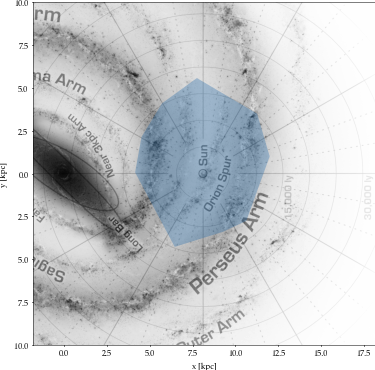

In [14]:
from scipy.spatial import ConvexHull

points = np.array([-1*galacto.x.to(u.kpc).value, -1*galacto.y.to(u.kpc).value]).T
hull = ConvexHull(points)

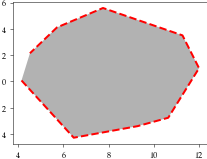

In [19]:
plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.3)
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)


In [44]:
plt.style.use('science')

In [27]:
plt.style.use('science')

In [45]:
coord = SkyCoord(
    ra=tic['ra'][m].values*u.deg,
    dec=tic['dec'][m].values*u.deg,
    distance=tic['dist_pc'][m].values*u.pc,
    frame='icrs')

gal = coord.galactocentric

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in pc
    [(-7785.82943231, 1056.26407938, 431.96207273),
     (-7747.04114228, 1189.6023869 , 482.71287628),
     (-7905.68394893,  674.56718992, 281.43481362), ...,
     (-7978.14199017,  827.51455948, 119.57088296),
     (-7842.52902063, 1618.93208123, 213.25268787),
     (-7972.61497279,  866.33001596, 124.23746685)]>

AttributeError: 'SkyCoord' object has no attribute 'x'

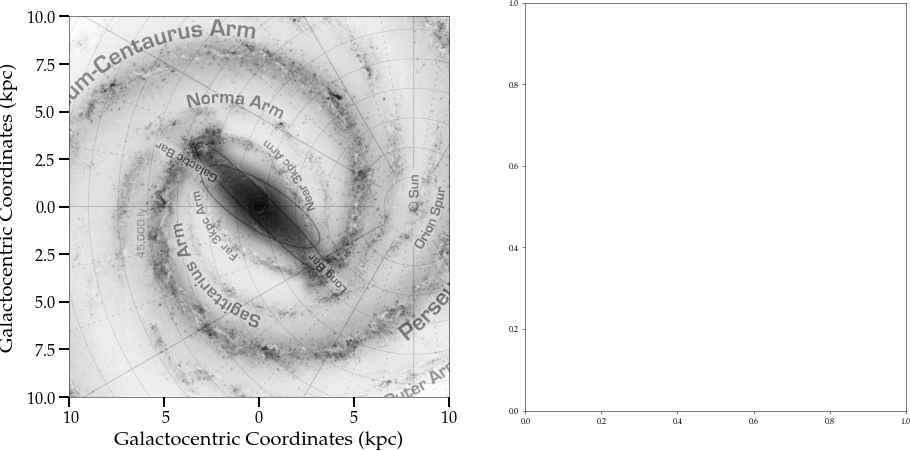

In [16]:
import pylab as plt
from mw_plot import MWPlot
from astropy import units as  u
import numpy as np

# setup a mw-plot instance of bird's eye view of the disc
mw1 = MWPlot(radius=10 * u.kpc, center=(0, 0)*u.kpc, 
             unit=u.kpc, 
             coord='galactocentric', annotation=True, grayscale=True)
# mw2 = MWPlot(radius=10 * u.kpc, mode="edge-on", center=(0, 0)*u.kpc, unit=u.kpc, coord='galactocentric', annotation=False, grayscale=True)

# setup subplots with matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7.5))

# transform the whole figure with mw-plot
# mw1.transform([ax1, ax2]) will have the same effect
mw1.transform(ax1)

ax1.scatter(gal.x.to(u.kpc).value, gal.y.to(u.kpc).value, c='r', s=0.05)